In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

custom_palette = ["#4DB6AC", "#81C784", "#BA68C8", "#FFD54F", "#64B5F6"]

sns.set_theme(style="darkgrid", palette=custom_palette)

plt.rcParams.update({
    "figure.figsize": (6, 4),          
    "axes.facecolor": "#222222",      
    "figure.facecolor": "#111111",   
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "#444444",
    "grid.linestyle": "--",             
    "axes.titleweight": "bold",       
    "axes.titlesize": 14,            
    "axes.labelsize": 12            
})

sns.set_palette(custom_palette)


In [38]:
file_path = "train.csv" # my.csv file is in the same folder
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [41]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


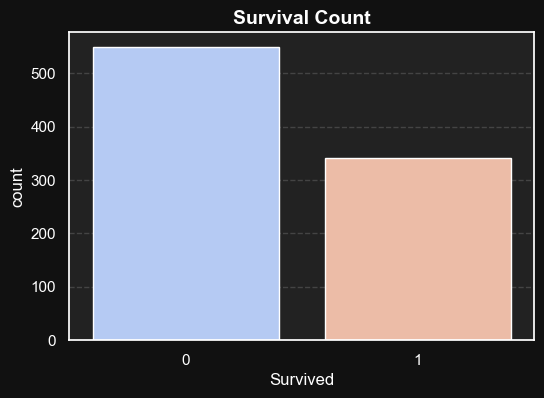

In [42]:
sns.countplot(x="Survived", data=df, hue="Survived", palette="coolwarm", legend=False)
plt.title("Survival Count")
plt.show()


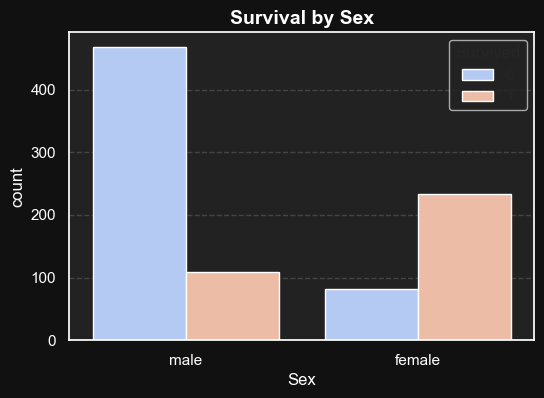

In [43]:
sns.countplot(x="Sex", hue="Survived", data=df, palette="coolwarm")
plt.title("Survival by Sex")
plt.show()


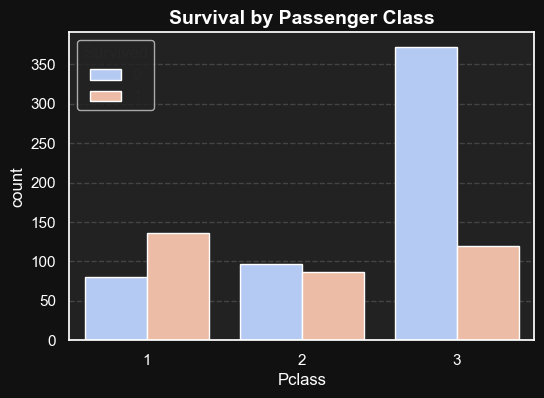

In [44]:
sns.countplot(x="Pclass", hue="Survived", data=df, palette="coolwarm")
plt.title("Survival by Passenger Class")
plt.show()


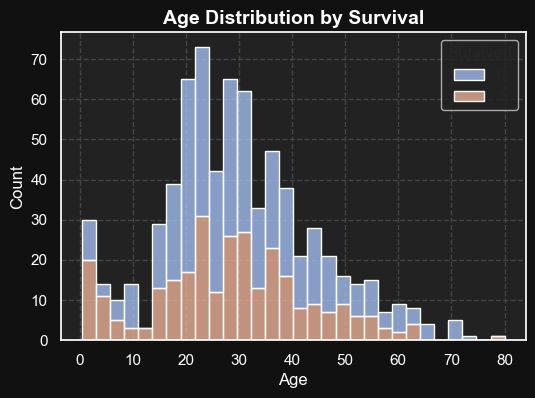

In [45]:
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", palette="coolwarm", bins=30)
plt.title("Age Distribution by Survival")
plt.show()


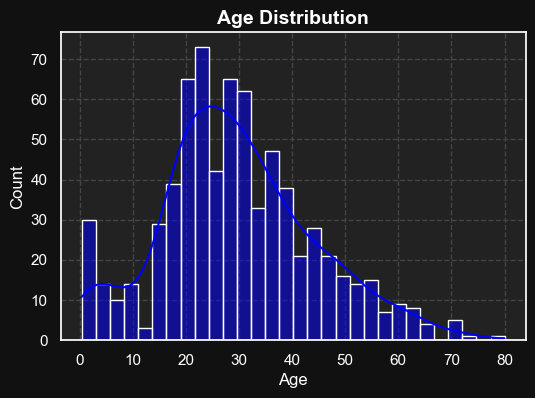

In [46]:
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.show()


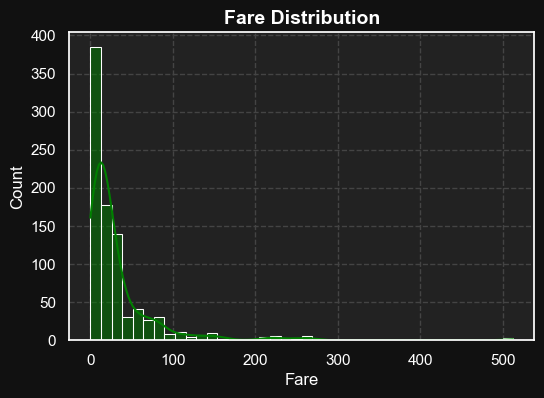

In [47]:
sns.histplot(df['Fare'], bins=40, kde=True, color='green')
plt.title("Fare Distribution")
plt.show()


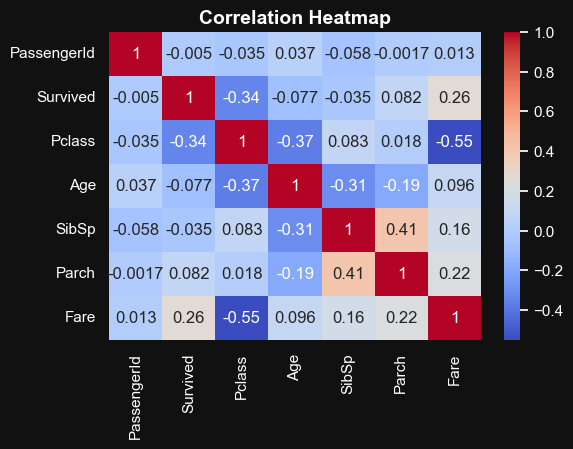

In [48]:
#keeping only the numeric columns to undergo corelation
numeric_df = df.select_dtypes(include=['number'])

#heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
